# Global Clusters: A Case Study on Socio-Economic and Health Indicators

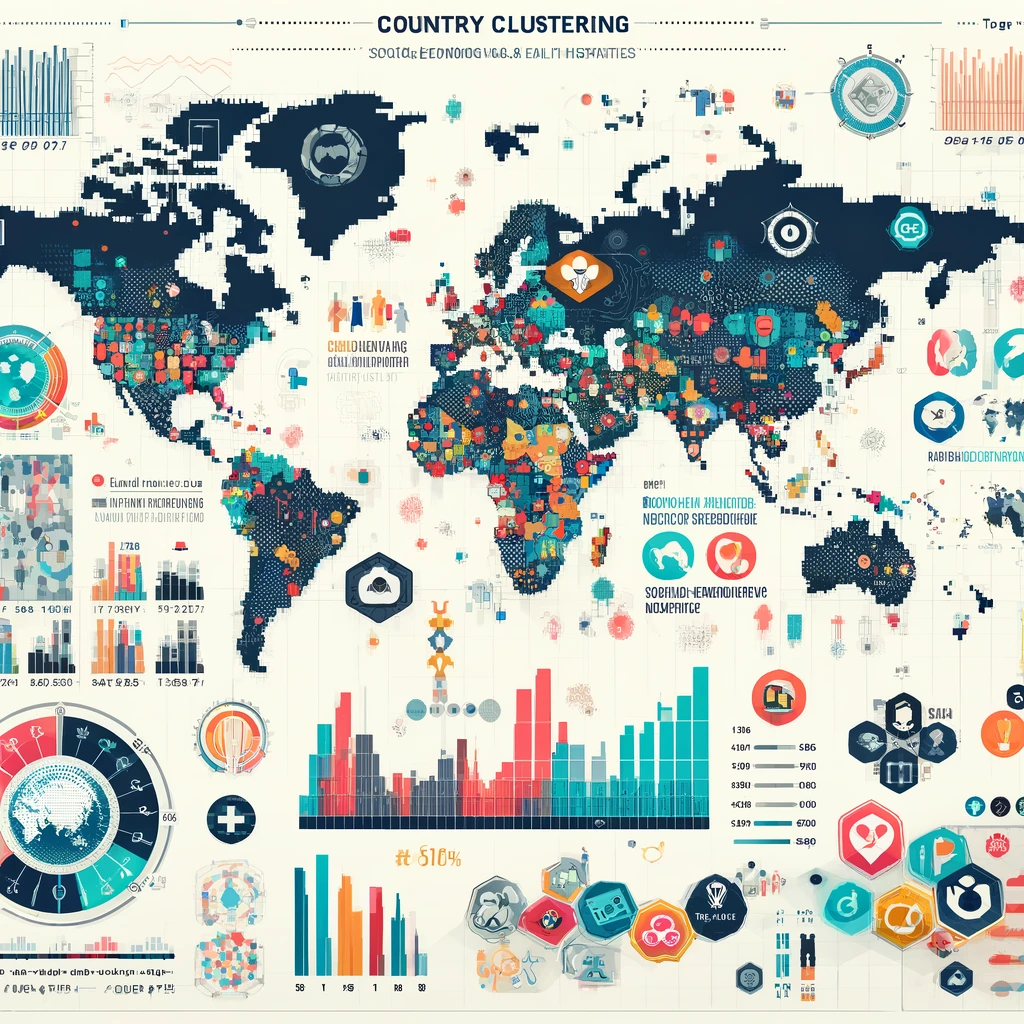

## Problem Statement - Identify whether a country is a country:
 - Developed
 - Developing
 - Under-Developed country

💡As there is no target variable, it is an unsupervised learning problem, hence we can use k-means clustering

## Importing the Necessary Libraries

In [147]:
# Supress Warnings

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [148]:
df = pd.read_csv('https://github.com/vmahawar/data-science-datasets-collection/raw/main/country-data.csv')

In [149]:
df.shape

(167, 10)

In [150]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## **Data Dictionary**:  
  - **country**: Name of the country (categorical).  
  - **child_mort**: Child mortality rate, deaths per 1000 live births (numerical).  
  - **exports**: Exports as a percentage of GDP (numerical).  
  - **health**: Health expenditure as a percentage of GDP (numerical).  
  - **imports**: Imports as a percentage of GDP (numerical).  
  - **income**: Per capita income in USD (numerical).  
  - **inflation**: Inflation rate, annual percentage (numerical).  
  - **life_expec**: Life expectancy in years (numerical).  
  - **total_fer**: Total fertility rate, average number of children per woman (numerical).  
  - **gdpp**: GDP per capita in USD (numerical).

## Missing Values Check

In [152]:
df.isnull().mean()

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

## Pre-Processing

In [153]:
## Calculating the absolute values of these columns

df["exports"] = df["exports"] * df["gdpp"]/100
df["imports"] = df["imports"] * df["gdpp"]/100
df["health"] = df["health"] * df["gdpp"]/100

In [154]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [155]:
## Dropping the Country Column
df1=df.drop('country',axis=1)

In [156]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Scaling

In [157]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1_scaled = scaler.fit_transform(df1)

In [158]:
df1_scaled

array([[4.26484907e-01, 2.95093321e-04, 3.36341972e-03, ...,
        4.75345168e-01, 7.36593060e-01, 3.07342821e-03],
       [6.81596884e-02, 6.22655666e-03, 2.94856458e-02, ...,
        8.71794872e-01, 7.88643533e-02, 3.68334145e-02],
       [1.20253165e-01, 9.31468360e-03, 2.00167874e-02, ...,
        8.75739645e-01, 2.74447950e-01, 4.03649935e-02],
       ...,
       [1.00778968e-01, 5.12723048e-03, 8.87582515e-03, ...,
        8.08678501e-01, 1.26182965e-01, 1.02988479e-02],
       [2.61441091e-01, 2.13292722e-03, 6.36206303e-03, ...,
        6.98224852e-01, 5.55205047e-01, 1.02988479e-02],
       [3.91918208e-01, 2.93402035e-03, 8.45852168e-03, ...,
        3.92504931e-01, 6.70347003e-01, 1.17305692e-02]])

## Some Terms and Concepts

#### Euclidean Distance


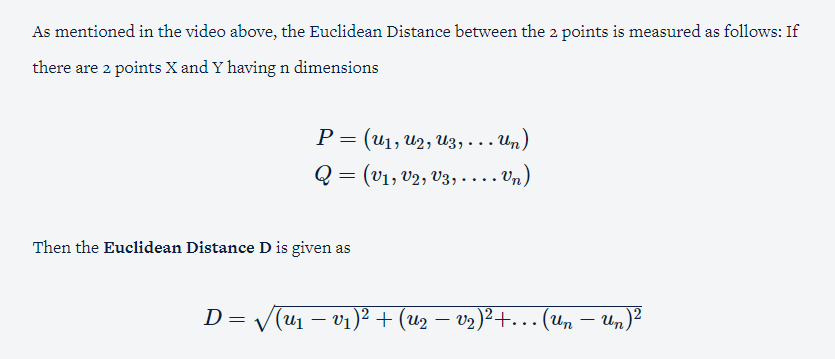

#### Centroid

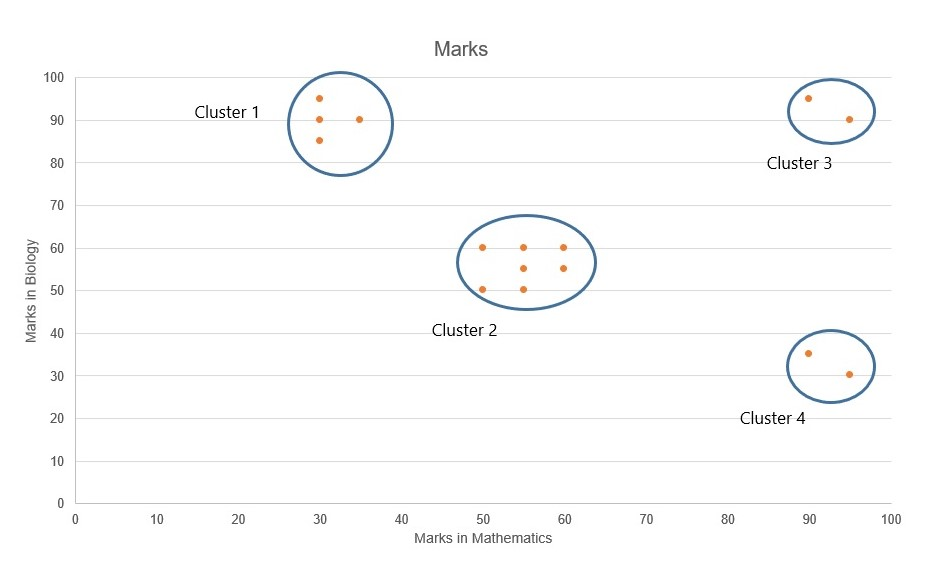

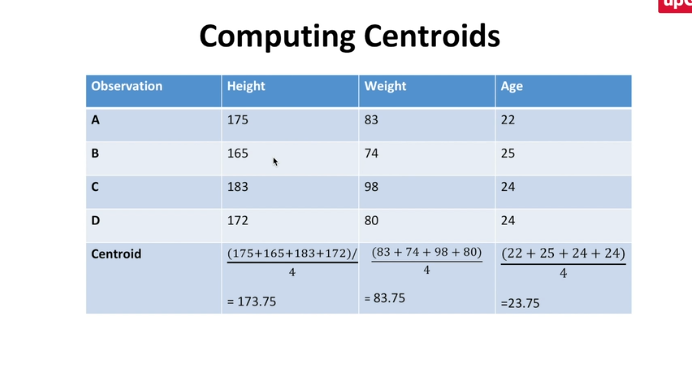

#### Steps of the Algorithm

**Assignment Step** and **Optimization Step**

 🔗[concept of the centroid](https://en.wikipedia.org/wiki/Centroid)

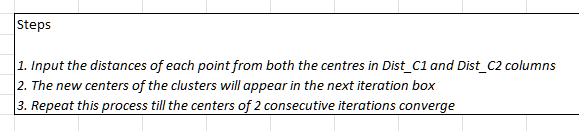

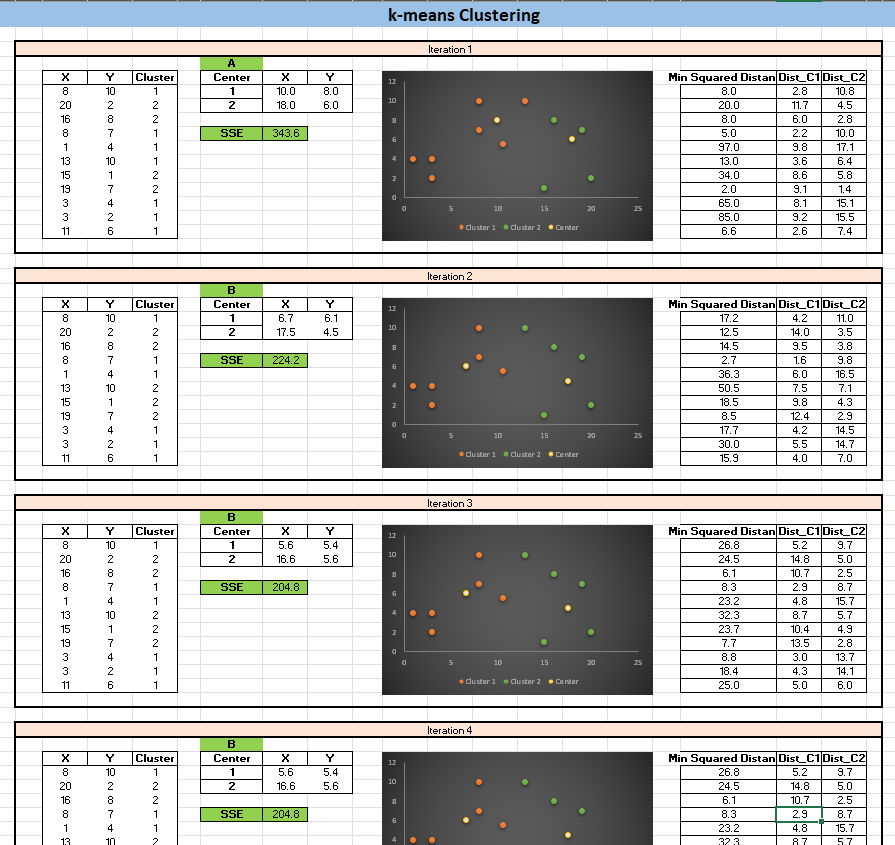

#### K Means Algorithm

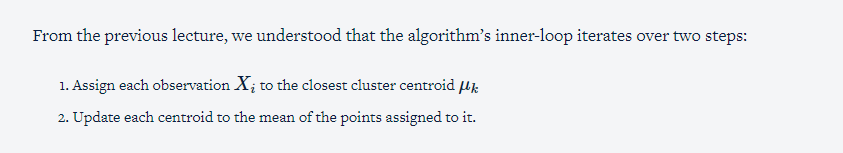

For a ith data point which is a 2d object and μ which is again a 2d object.

We compute the distance between these two, this is given by:

`d(xi, μk)`, where k is the number of clusters and then from these k different results we will choose the minimum of all.

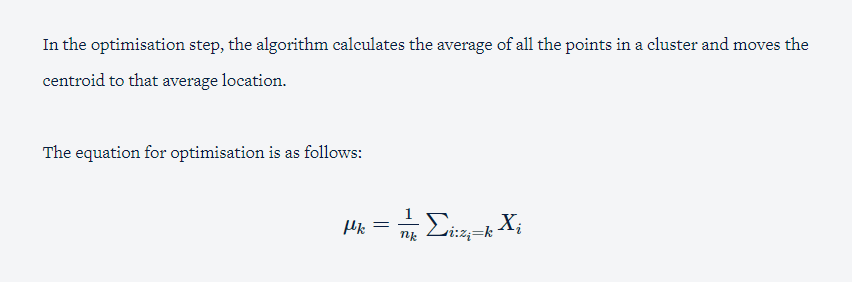

 - 🔗[Additional Reading](https://escholarship.org/uc/item/917739k8)

#### Means++ Algorithm

**Note**: In K-means++ you pick the initial centroids using an algorithm that tries to initialise centroids that are `far apart from each other`.

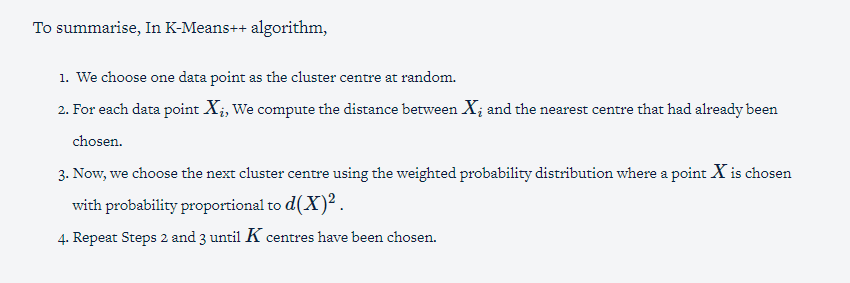

#### Visualising the K Means Algorithm

🔗[Play Ground - How to pick the initial centroids](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

#### Practical Consideration in K Means Algorithm

The choice of initial centroid points determines the final cluster

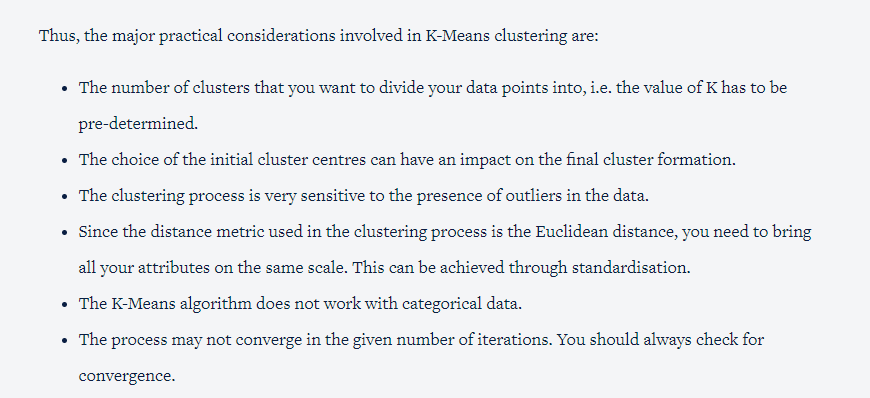

🔗[K-Modes - The Shape of Data](https://shapeofdata.wordpress.com/2014/03/04/k-modes/) - Vector Vs K-Modes

## Eblow Method - SSD Method - Finding the Optimal Number of Clusters
 - Although, the problem statement clearly states only three clusters are required. But good idea to see the ideal clusters for our country dataset
 - SSD - Sum of Square Deviation
 - WCSS - Within-Cluster Sum of Squares

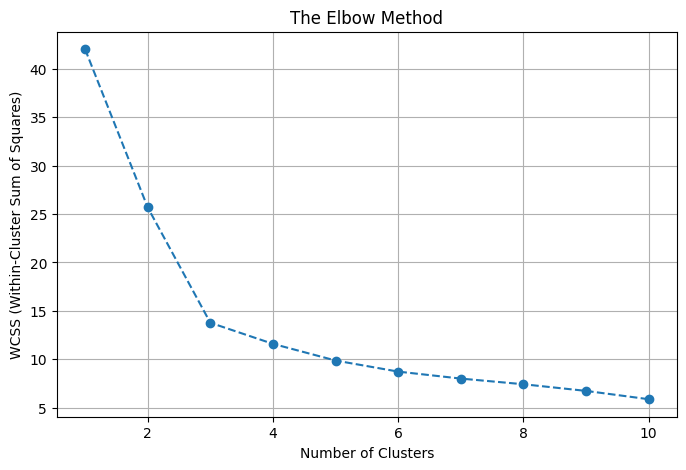

In [159]:
wcss = []

# Loop through different values of k (e.g., 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df1_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()


## Modelling - Introduction - K is the hyperparameter

In [160]:
k=3

In [161]:
from sklearn.cluster import KMeans

In [162]:
kmeans = KMeans(n_clusters=k,random_state=100)
kmeans.fit(df1_scaled)

KMeans(n_clusters=3, random_state=100)

In [163]:
output = kmeans.predict(df1_scaled)

In [164]:
output

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [165]:
# Adding back to original dataset
df["cluster"] = output

In [166]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


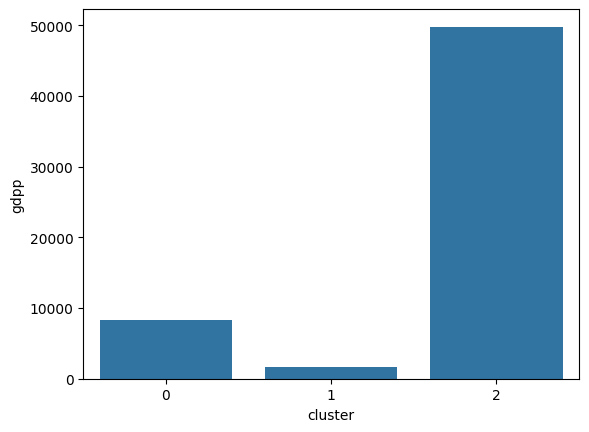

In [167]:
sns.barplot(x=df["cluster"],y=df["gdpp"],ci=None)
plt.show()

Based on above
 - 2 - Developed Country
 - 1 - Under-developed Country
 - 0 - Developing Country

In [168]:
df['cluster']=df["cluster"].map({1:"Under Developed", 2: "Developed",0:"Developing"})

In [169]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,Under Developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,Under Developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,Developing


## Validating cluster outcome by visualizing and apply business context

----------------- gdpp  Vs Clusters----------------------


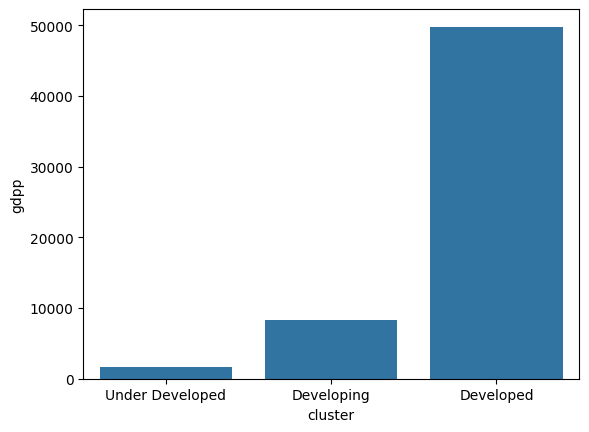

----------------- child_mort  Vs Clusters----------------------


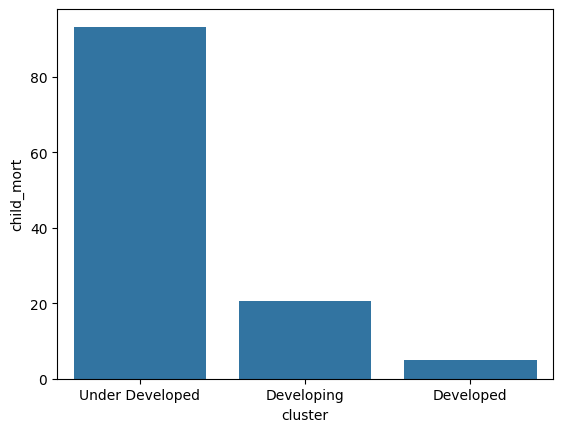

----------------- exports  Vs Clusters----------------------


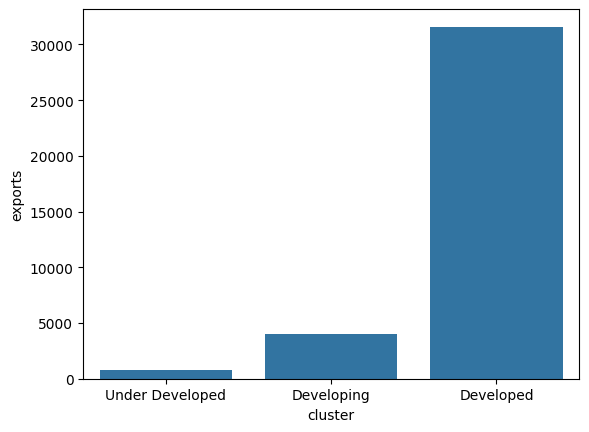

----------------- health  Vs Clusters----------------------


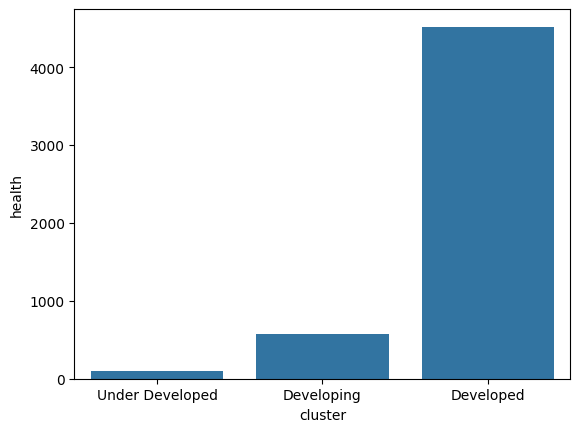

----------------- imports  Vs Clusters----------------------


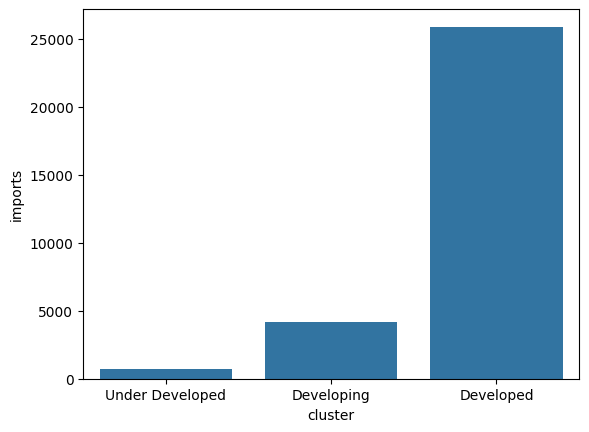

----------------- income  Vs Clusters----------------------


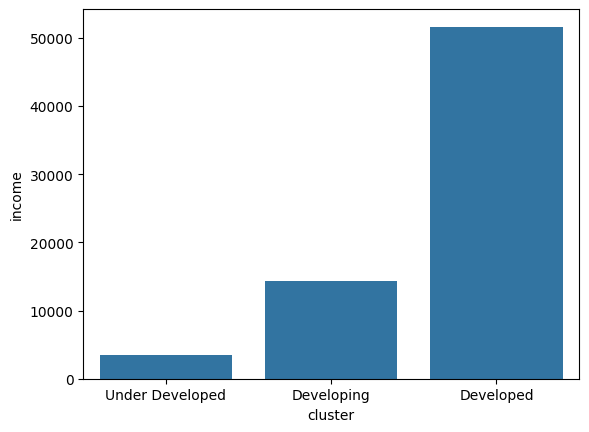

----------------- inflation  Vs Clusters----------------------


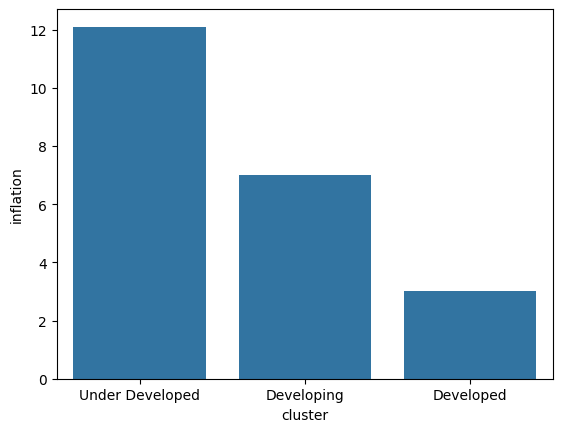

----------------- life_expec  Vs Clusters----------------------


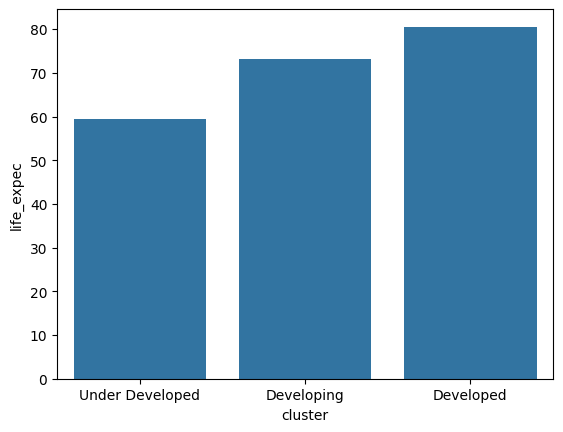

----------------- total_fer  Vs Clusters----------------------


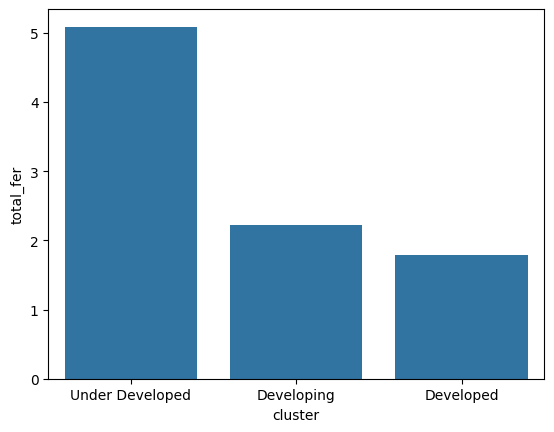

In [170]:
cols = ['gdpp','child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer']
for i in cols:
    print('-----------------',i," Vs Clusters----------------------")
    sns.barplot(x=df["cluster"],y=df[i],ci=None)
    plt.show()

In [171]:
list(df[df["cluster"]=='Developed']["country"])

['Australia',
 'Austria',
 'Belgium',
 'Brunei',
 'Canada',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Iceland',
 'Ireland',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Qatar',
 'Singapore',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

After K-Mean is finalized for clustering.

## **Silhouette Metric** 

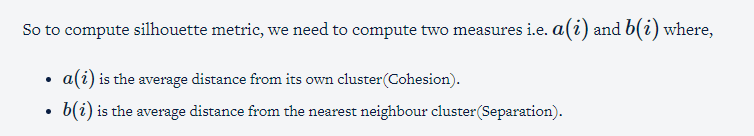

For every ith point calculate the above 2 measures

S(i) = b(i) - a(i) / (max(b(i), a(i)))

This is done for every k.

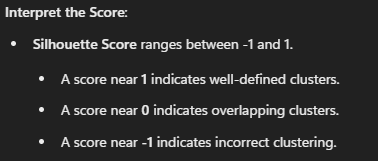

In [192]:
from sklearn.metrics import silhouette_score

labels = kmeans.labels_
score = silhouette_score(df1_scaled, labels)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.4875688325246982


In [195]:
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

# Assuming `X` is your dataset and `labels` are the cluster labels assigned by the model
# Example: labels = kmeans.fit_predict(X)

# Calculate the silhouette scores for each data point
silhouette_values = silhouette_samples(df1_scaled, labels)

# Create a DataFrame to store clusters and their corresponding silhouette scores
silhouette_df = pd.DataFrame({
    'Cluster': labels,  # Cluster labels
    'Silhouette Score': silhouette_values  # Individual silhouette scores
})

# Group by clusters to calculate the average silhouette score per cluster
average_silhouette_scores = silhouette_df.groupby('Cluster')['Silhouette Score'].mean().reset_index()

print("Silhouette Scores for Each Cluster:")
print(average_silhouette_scores)


Silhouette Scores for Each Cluster:
   Cluster  Silhouette Score
0        0          0.544548
1        1          0.457024
2        2          0.333417


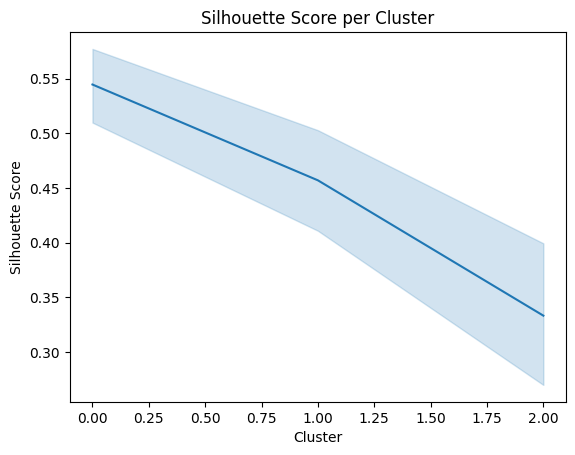

In [196]:
sns.lineplot(x='Cluster', y='Silhouette Score', data=silhouette_df)
plt.title('Silhouette Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.show()

🔗[Local Maxima and Local Minima](https://en.wikipedia.org/wiki/Maximum_and_minimum)

## Hierarchical Clustering

In [174]:
from scipy.cluster.hierarchy import dendrogram, linkage

#### Check for 20 countries

In [175]:
temp = pd.DataFrame(df1_scaled).head(20)

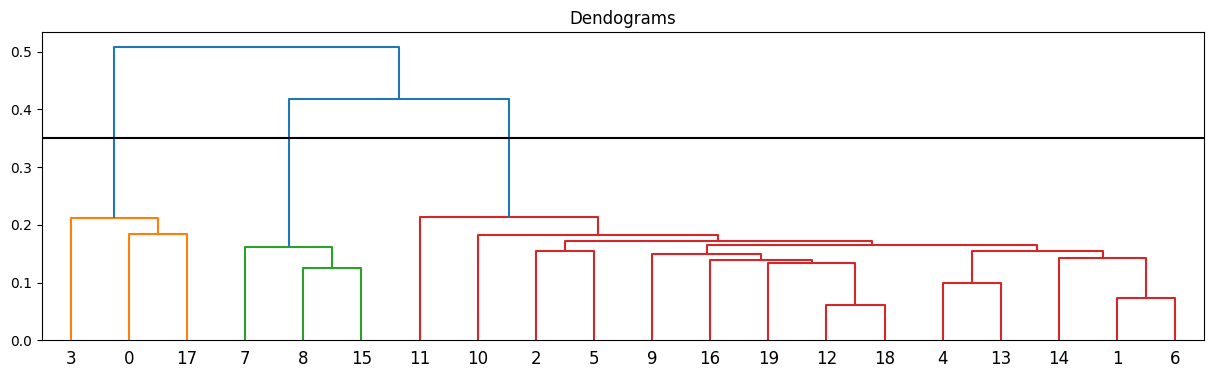

In [176]:
Z = linkage(temp,method="single")
plt.figure(figsize=(15,4))
plt.title("Dendograms")
dendogram1 = dendrogram(Z)
d=0.35
plt.axhline(y=d,c='k')
plt.show()

#### Check for all countries

In [177]:
temp_all = pd.DataFrame(df1_scaled)

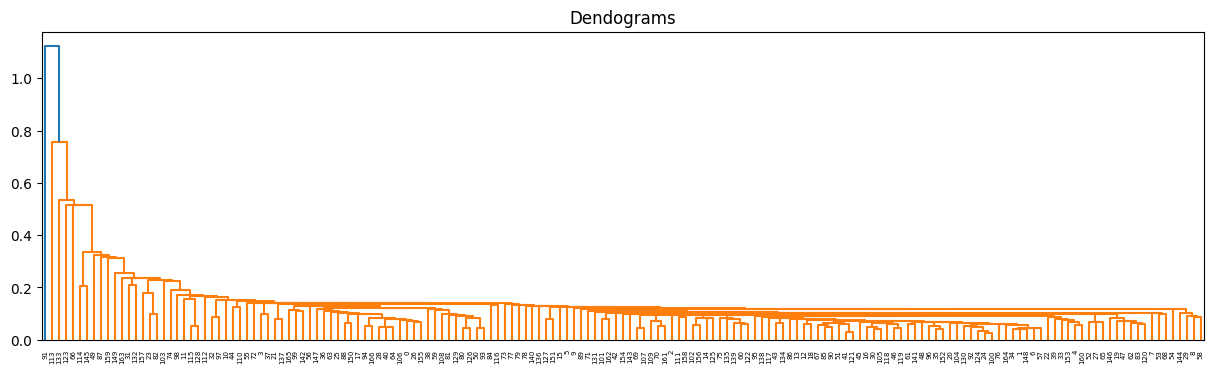

In [178]:
Z = linkage(temp_all,method="single")
plt.figure(figsize=(15,4))
plt.title("Dendograms")
dendogram1 = dendrogram(Z)
# d=0.35
# plt.axhline(y=d,c='k')
plt.show()

---

## Cluster Tendency

🔗[**Use Hopkins Test** - For cluster tendency Validating the clustering tendency - using Hopkins statistic](https://stats.stackexchange.com/questions/332651/validating-cluster-tendency-using-hopkins-statistic)

🔗[Assessing Clustering Tendency](https://www.datanovia.com/en/lessons/assessing-clustering-tendency/#methods-for-assessing-clustering-tendency)

## Hopkins Statistics:
The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

Some usefull links to understand Hopkins Statistics:
- [WikiPedia](https://en.wikipedia.org/wiki/Hopkins_statistic)
- [Article](http://www.sthda.com/english/articles/29-cluster-validation-essentials/95-assessing-clustering-tendency-essentials/)

In [183]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [191]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(temp_all)

0.8717582612069039

---